In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline 
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv')

## Data Cleaning

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(8790, 10)

In [6]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [7]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'R', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [8]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
df.describe(include = "object")

,show_id,type,title,director,country,date_added,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790,8790,8790
unique,8790,2,8787,4528,86,1713,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,1/1/2020,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,3205,1791,362


## *EDA*

In [10]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [11]:
df.columns.to_list()

['show_id',
 'type',
 'title',
 'director',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in']

In [12]:
df['type'].unique().tolist()

['Movie', 'TV Show']

In [13]:
df['director'].nunique()

4528

In [14]:
#Converting date to timestamp
df['date_added']=pd.to_datetime(df['date_added'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [15]:
df['rating'].unique().tolist()

['PG-13',
 'TV-MA',
 'TV-PG',
 'TV-14',
 'TV-Y7',
 'TV-Y',
 'PG',
 'TV-G',
 'R',
 'G',
 'NC-17',
 'NR',
 'TV-Y7-FV',
 'UR']

In [16]:
countries=df['country'].unique().tolist()
countries

['United States',
 'France',
 'Brazil',
 'United Kingdom',
 'India',
 'Germany',
 'Pakistan',
 'Not Given',
 'China',
 'South Africa',
 'Japan',
 'Nigeria',
 'Spain',
 'Philippines',
 'Australia',
 'Argentina',
 'Canada',
 'Hong Kong',
 'Italy',
 'New Zealand',
 'Egypt',
 'Colombia',
 'Mexico',
 'Belgium',
 'Switzerland',
 'Taiwan',
 'Bulgaria',
 'Poland',
 'South Korea',
 'Saudi Arabia',
 'Thailand',
 'Indonesia',
 'Kuwait',
 'Malaysia',
 'Vietnam',
 'Lebanon',
 'Romania',
 'Syria',
 'United Arab Emirates',
 'Sweden',
 'Mauritius',
 'Austria',
 'Turkey',
 'Czech Republic',
 'Cameroon',
 'Netherlands',
 'Ireland',
 'Russia',
 'Kenya',
 'Chile',
 'Uruguay',
 'Bangladesh',
 'Portugal',
 'Hungary',
 'Norway',
 'Singapore',
 'Iceland',
 'Serbia',
 'Namibia',
 'Peru',
 'Mozambique',
 'Ghana',
 'Zimbabwe',
 'Israel',
 'Finland',
 'Denmark',
 'Paraguay',
 'Cambodia',
 'Georgia',
 'Soviet Union',
 'Greece',
 'West Germany',
 'Iran',
 'Venezuela',
 'Slovenia',
 'Guatemala',
 'Jamaica',
 'Somali

In [17]:
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


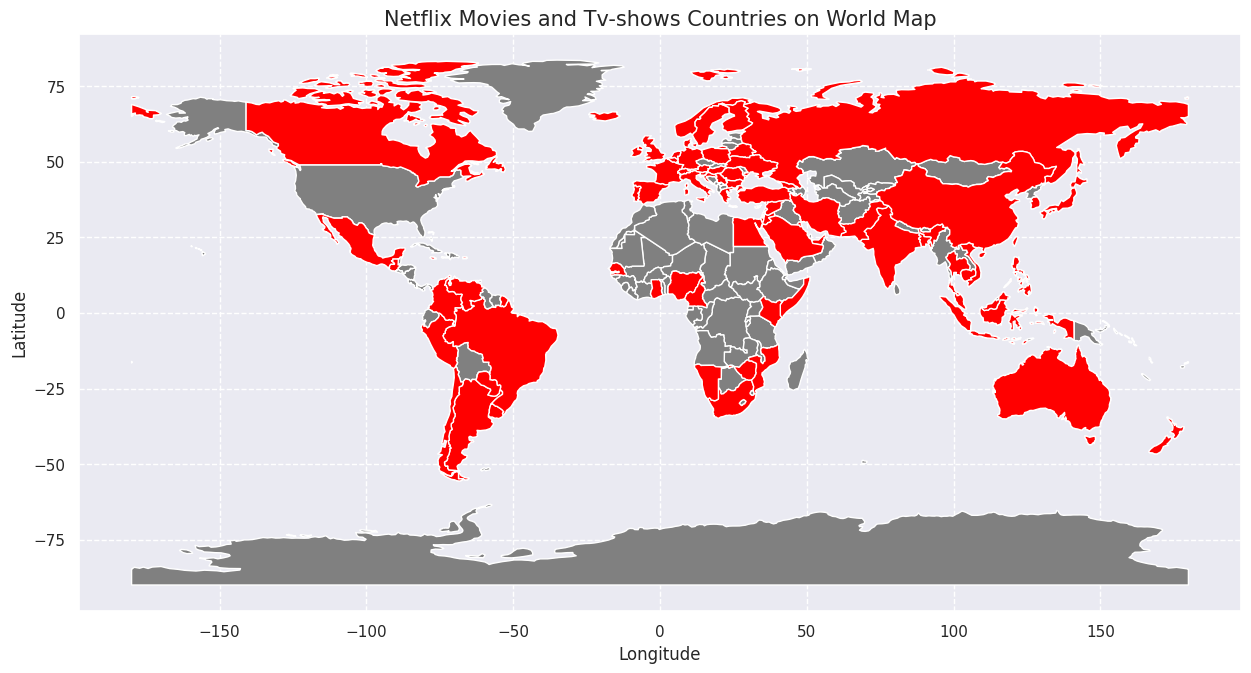

In [18]:
#Filter the geodataframe for the countries in the list
highlighted_countries=world[world['name'].isin(countries)]
#Plotting the map
fig,ax=plt.subplots(1,1,figsize=(15,10))
world.plot(ax=ax,color='grey')
highlighted_countries.plot(ax=ax,color='red')
#Adding the titles and lables
plt.title('Netflix Movies and Tv-shows Countries on World Map', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True,linestyle='--')
plt.show()



## Relevant Countries most shows

In [19]:
country_counts=df['country'].value_counts()
mean_count=country_counts.mean()
country_counts

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

In [20]:
relevant_countries=country_counts[country_counts>=mean_count]
relevant_countries

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Mexico             138
Egypt              123
Australia          114
Turkey             112
Nigeria            105
Germany            104
Name: count, dtype: int64

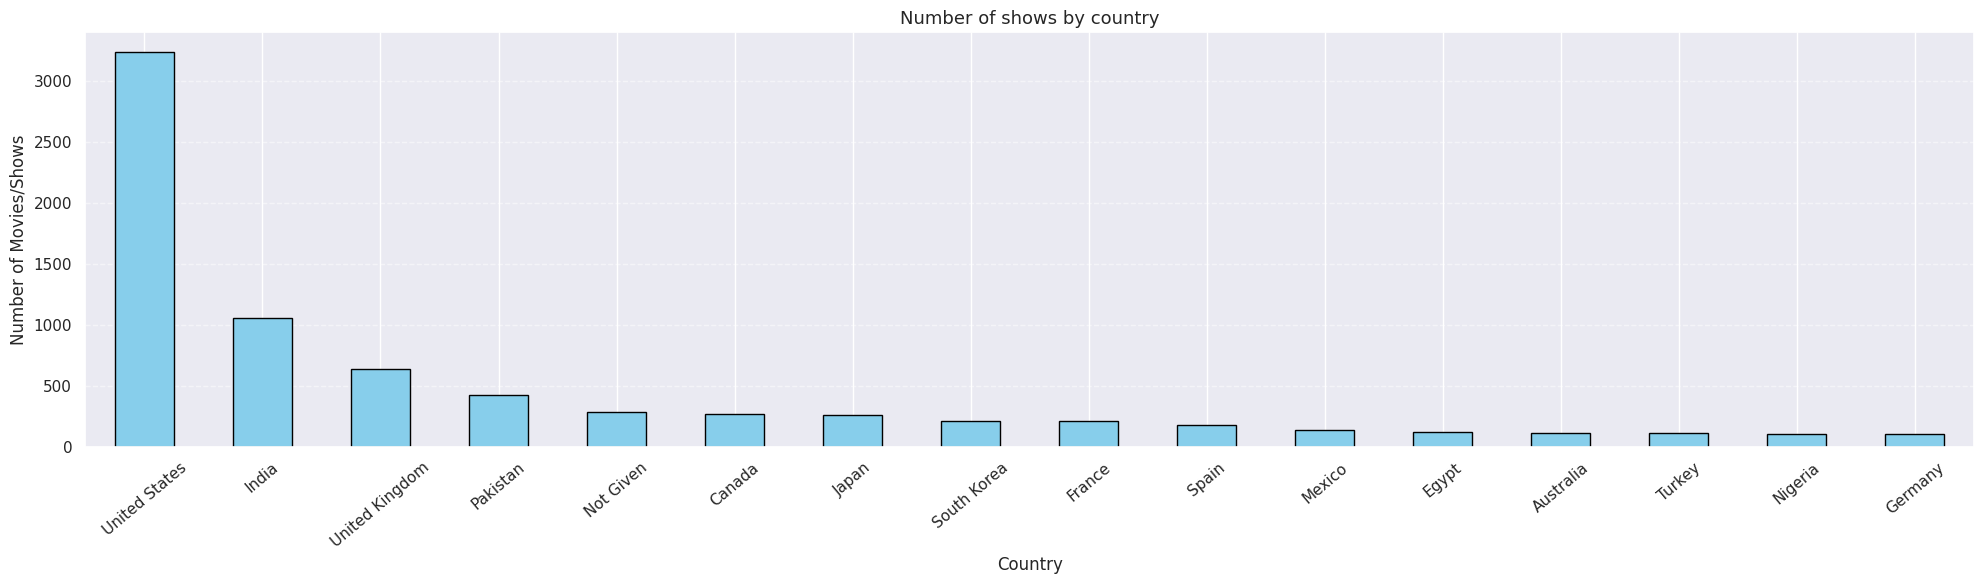

In [21]:
plt.figure(figsize=(20,6))
relevant_countries.plot(kind='bar',color='skyblue',edgecolor='black')
plt.xlabel('Country',fontsize=12)
plt.ylabel('Number of Movies/Shows',fontsize=12)
plt.title('Number of shows by country', fontsize=13)
plt.xticks(rotation=40)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

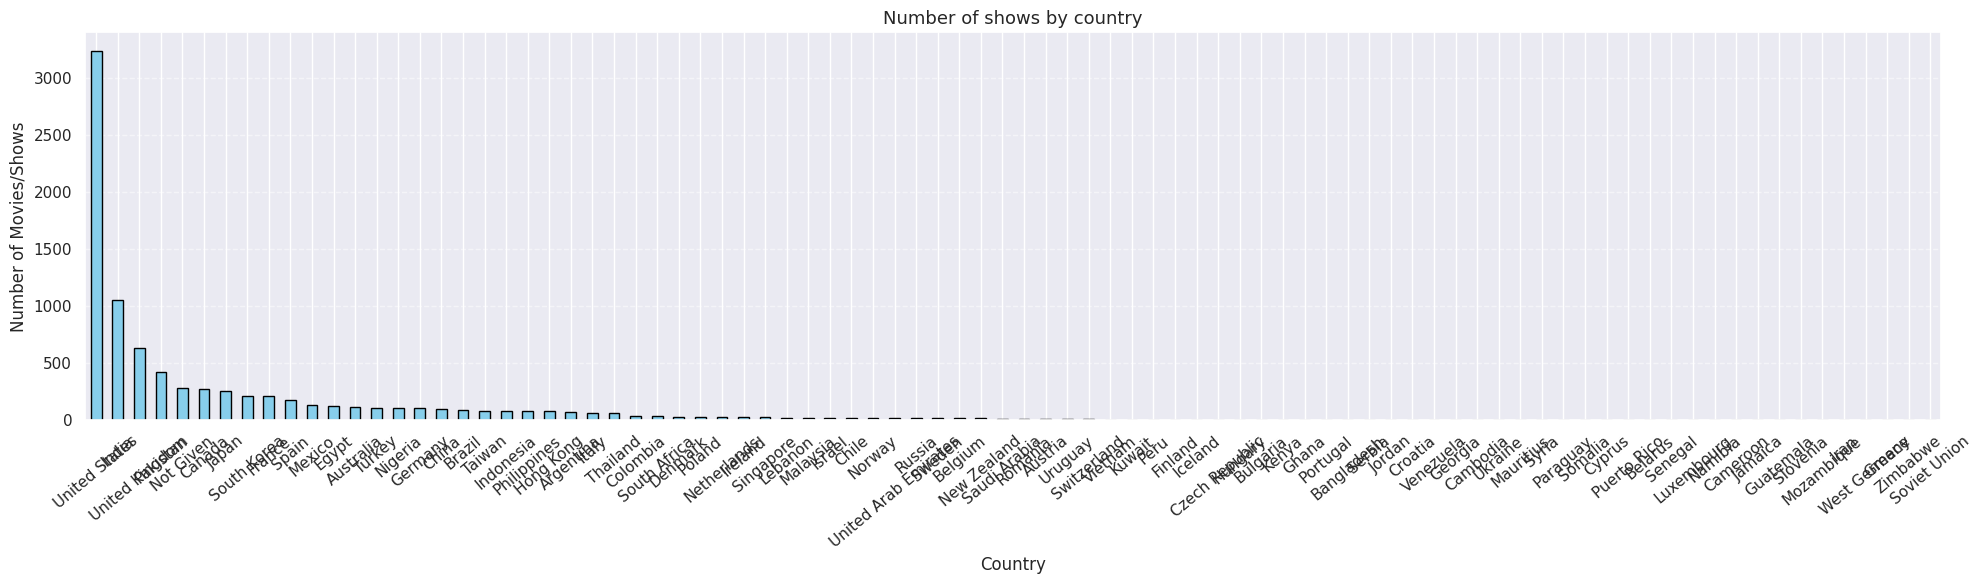

In [22]:
plt.figure(figsize=(20,6))
country_counts.plot(kind='bar',color='skyblue',edgecolor='black')
plt.xlabel('Country',fontsize=12)
plt.ylabel('Number of Movies/Shows',fontsize=12)
plt.title('Number of shows by country', fontsize=13)
plt.xticks(rotation=40)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

In [23]:
#['Movie' Vs 'TV Show']
types_pdsr=df['type'].value_counts()
types_pdsr

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

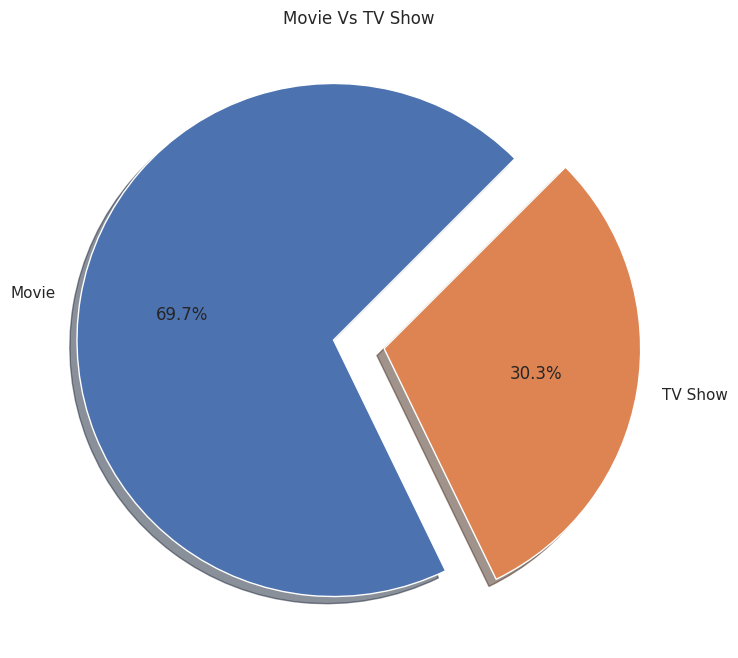

In [24]:
#Creating a pie plot
plt.figure(figsize=(8,8))
plt.pie(types_pdsr,labels=types_pdsr.index,autopct='%1.1f%%',startangle=45,shadow=True,explode=(0.1,0.1))
plt.title('Movie Vs TV Show')
plt.axis('equal')
plt.show()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


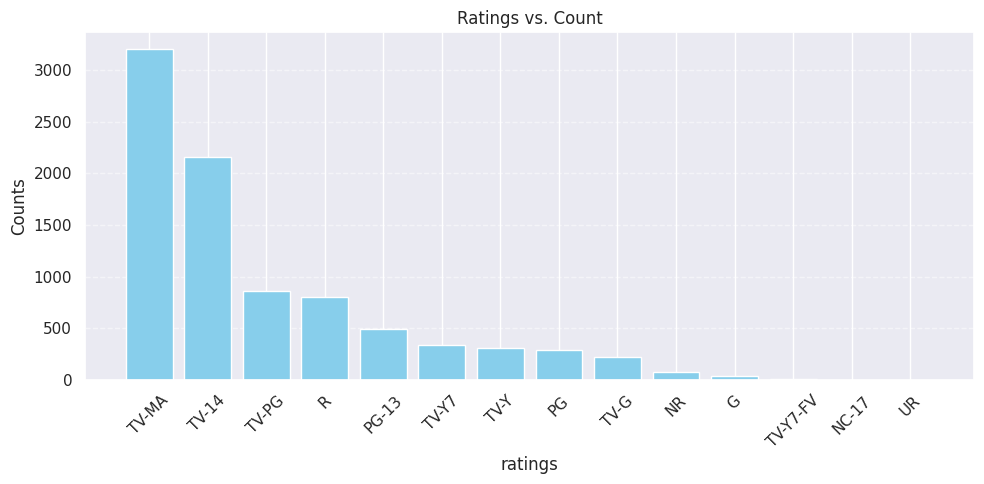

In [25]:
rating_counts=df['rating'].value_counts()
print(rating_counts)
#create histogram
plt.figure(figsize=(10,5))
plt.bar(rating_counts.index,rating_counts.values,color='skyblue')
plt.title("Ratings vs. Count")
plt.xlabel('ratings')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.tight_layout()

plt.show()



In [26]:
rating_pdsr=pd.Series(df['rating'].unique())

In [27]:
rating_pdsr

0        PG-13
1        TV-MA
2        TV-PG
3        TV-14
4        TV-Y7
5         TV-Y
6           PG
7         TV-G
8            R
9            G
10       NC-17
11          NR
12    TV-Y7-FV
13          UR
dtype: object

In [28]:
rating_category_map = {
    'G': 'Suitable for All',
    'TV-G': 'Suitable for All',
    'TV-Y': 'Suitable for All',
    'PG': 'For Children',
    'TV-Y7': 'For Children',
    'TV-Y7-FV': 'For Children',
    'PG-13': 'Parental Guidance',
    'TV-PG': 'Parental Guidance',
    'R': 'For Teens',
    'TV-14': 'For Teens',
    'NC-17': 'For Adults',
    'TV-MA': 'For Adults',
    'NR': 'For Adults',
    'UR': 'For Adults'
}
df['category']=df['rating'].apply(lambda x:rating_category_map.get(x,'Uncategorized'))

In [29]:
category_counts=df['category'].value_counts()

In [30]:
category_counts

category
For Adults           3290
For Teens            2956
Parental Guidance    1351
For Children          626
Suitable for All      567
Name: count, dtype: int64

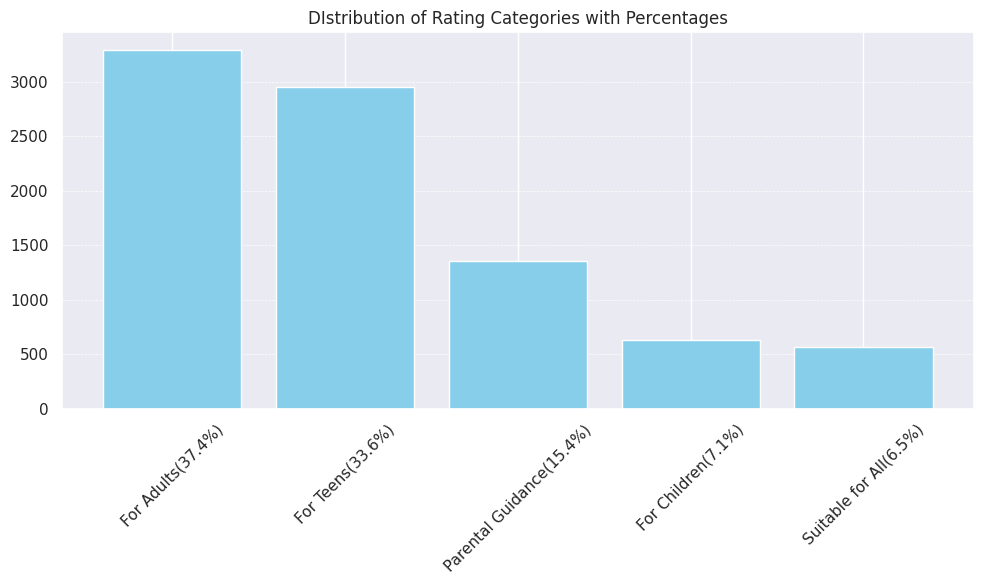

In [31]:
plt.figure(figsize=(10,6))
category_percent=(category_counts/category_counts.sum())*100
combined_labels=[f"{category}({percent:.1f}%)" for category,percent in zip(category_counts.index,category_percent)]
bars=plt.bar(combined_labels,category_counts.values,color='skyblue')

plt.xlabel=('Categories')
plt.ylabel=('Number of records')
plt.title('DIstribution of Rating Categories with Percentages')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--',linewidth=0.5)
plt.tight_layout()
plt.show()





In [32]:
print(combined_labels)

['For Adults(37.4%)', 'For Teens(33.6%)', 'Parental Guidance(15.4%)', 'For Children(7.1%)', 'Suitable for All(6.5%)']


In [33]:
#top 10 directors
top_10_directors=df[df['director']!='Not Given']['director'].value_counts().head(10)
top_10_directors

director
Rajiv Chilaka             20
Raúl Campos, Jan Suter    18
Alastair Fothergill       18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Name: count, dtype: int64

In [34]:
df['release_year']

0       2020
1       2021
2       2021
3       2021
4       1993
        ... 
8785    2016
8786    2016
8787    2012
8788    2016
8789    2016
Name: release_year, Length: 8790, dtype: int64

In [35]:
df['release_year'].min()

1925

In [36]:

df['release_year'].max()

2021

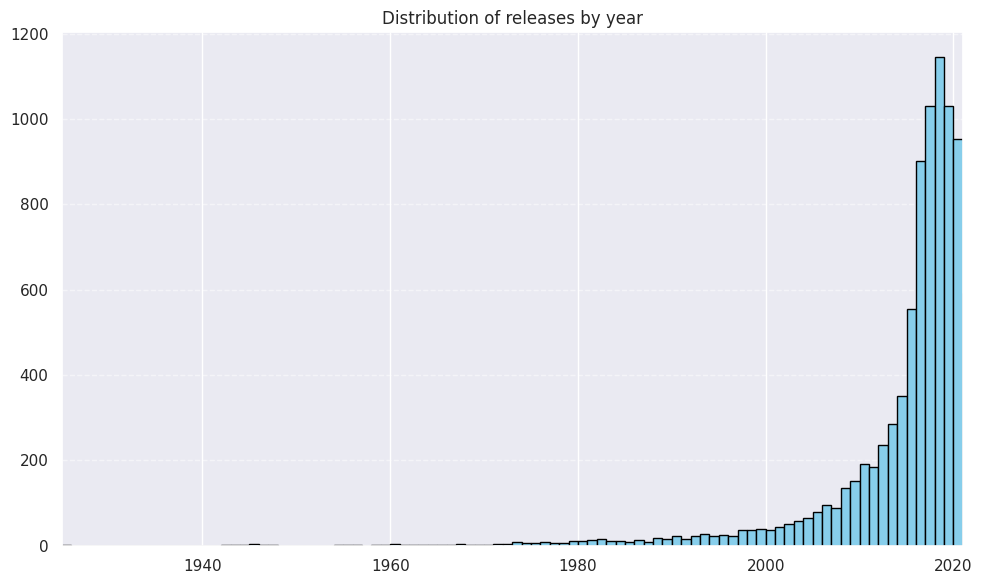

In [37]:
plt.figure(figsize=(10,6))
plt.hist(df['release_year'],bins=range(df['release_year'].min(),df['release_year'].max()+2),color='skyblue',edgecolor='black')

plt.title('Distribution of releases by year')
plt.grid(True,linestyle='--',axis='y',alpha=0.5)
plt.xlim(df['release_year'].min(),df['release_year'].max())
plt.tight_layout()

plt.show()

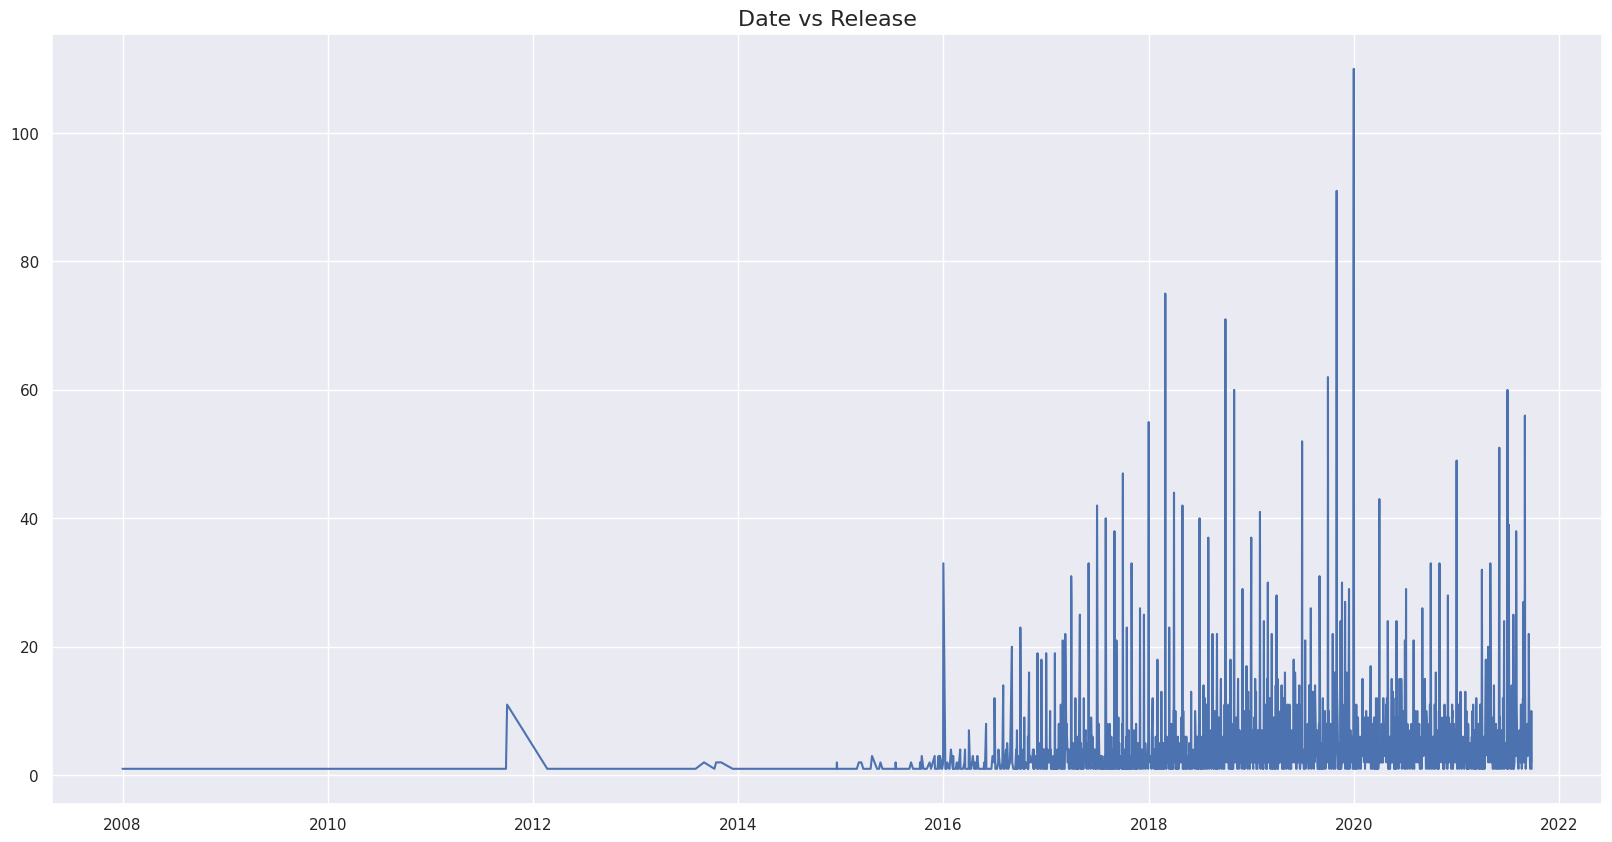

In [38]:
#date vs releases
release_counts=df['date_added'].value_counts().sort_index()
plt.figure(figsize=(20,10))
plt.plot(release_counts.index,release_counts.values)

plt.title('Date vs Release', fontsize=16)
# plt.xlabel('Days',fontsize=16)
# plt.ylabel('Releases',fontsize=1)
plt.show()

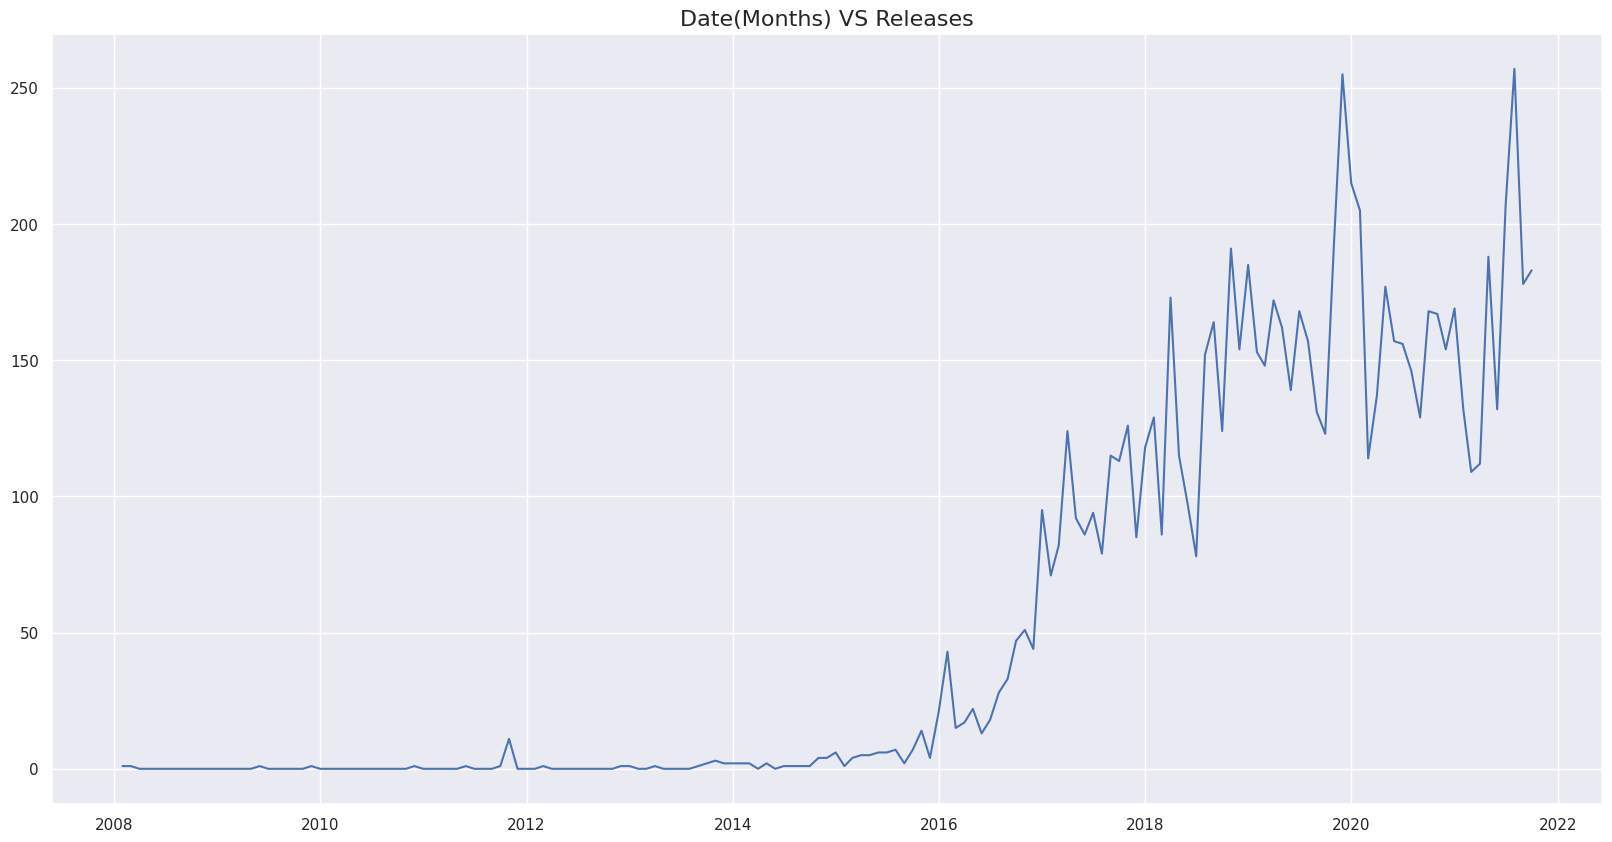

In [39]:
#date(month) vs realeases
release_counts_df = df.set_index('date_added').sort_index()
release_counts_monthly =  release_counts_df.resample('M').size()
plt.figure(figsize=(20,10))  
plt.plot(release_counts_monthly.index, release_counts_monthly.values)

plt.title('Date(Months) VS Releases', fontsize=16)
# plt.xlabel('Days', fontsize=16)
# plt.ylabel('Releases', fontsize=1)
plt.show()

In [40]:
df['listed_in']

0                                           Documentaries
1       Crime TV Shows, International TV Shows, TV Act...
2                      TV Dramas, TV Horror, TV Mysteries
3                      Children & Family Movies, Comedies
4        Dramas, Independent Movies, International Movies
                              ...                        
8785                    International TV Shows, TV Dramas
8786                                             Kids' TV
8787    International TV Shows, Romantic TV Shows, TV ...
8788                                             Kids' TV
8789                                             Kids' TV
Name: listed_in, Length: 8790, dtype: object

In [41]:
genres_list = df['listed_in'].to_list()
genres_join = ', '.join(genres_list)
split_genres = genres_join.split(', ')
split_genres
genres = set(split_genres)
genres

{'Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British TV Shows',
 'Children & Family Movies',
 'Classic & Cult TV',
 'Classic Movies',
 'Comedies',
 'Crime TV Shows',
 'Cult Movies',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Reality TV',
 'Romantic Movies',
 'Romantic TV Shows',
 'Sci-Fi & Fantasy',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Sports Movies',
 'Stand-Up Comedy',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows',
 'Thrillers'}

In [42]:
len(genres)

42

In [43]:
df['listed_in']

0                                           Documentaries
1       Crime TV Shows, International TV Shows, TV Act...
2                      TV Dramas, TV Horror, TV Mysteries
3                      Children & Family Movies, Comedies
4        Dramas, Independent Movies, International Movies
                              ...                        
8785                    International TV Shows, TV Dramas
8786                                             Kids' TV
8787    International TV Shows, Romantic TV Shows, TV ...
8788                                             Kids' TV
8789                                             Kids' TV
Name: listed_in, Length: 8790, dtype: object

In [44]:
df_exploded = df['listed_in'].str.split(', ').explode()
df_exploded

0                Documentaries
1               Crime TV Shows
1       International TV Shows
1        TV Action & Adventure
2                    TV Dramas
                 ...          
8787    International TV Shows
8787         Romantic TV Shows
8787                 TV Dramas
8788                  Kids' TV
8789                  Kids' TV
Name: listed_in, Length: 19294, dtype: object

In [45]:
genre_counts = df_exploded.value_counts()
genre_counts

listed_in
International Movies            2752
Dramas                          2426
Comedies                        1674
International TV Shows          1349
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      573
Crime TV Shows                   469
Kids' TV                         448
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     174
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows             

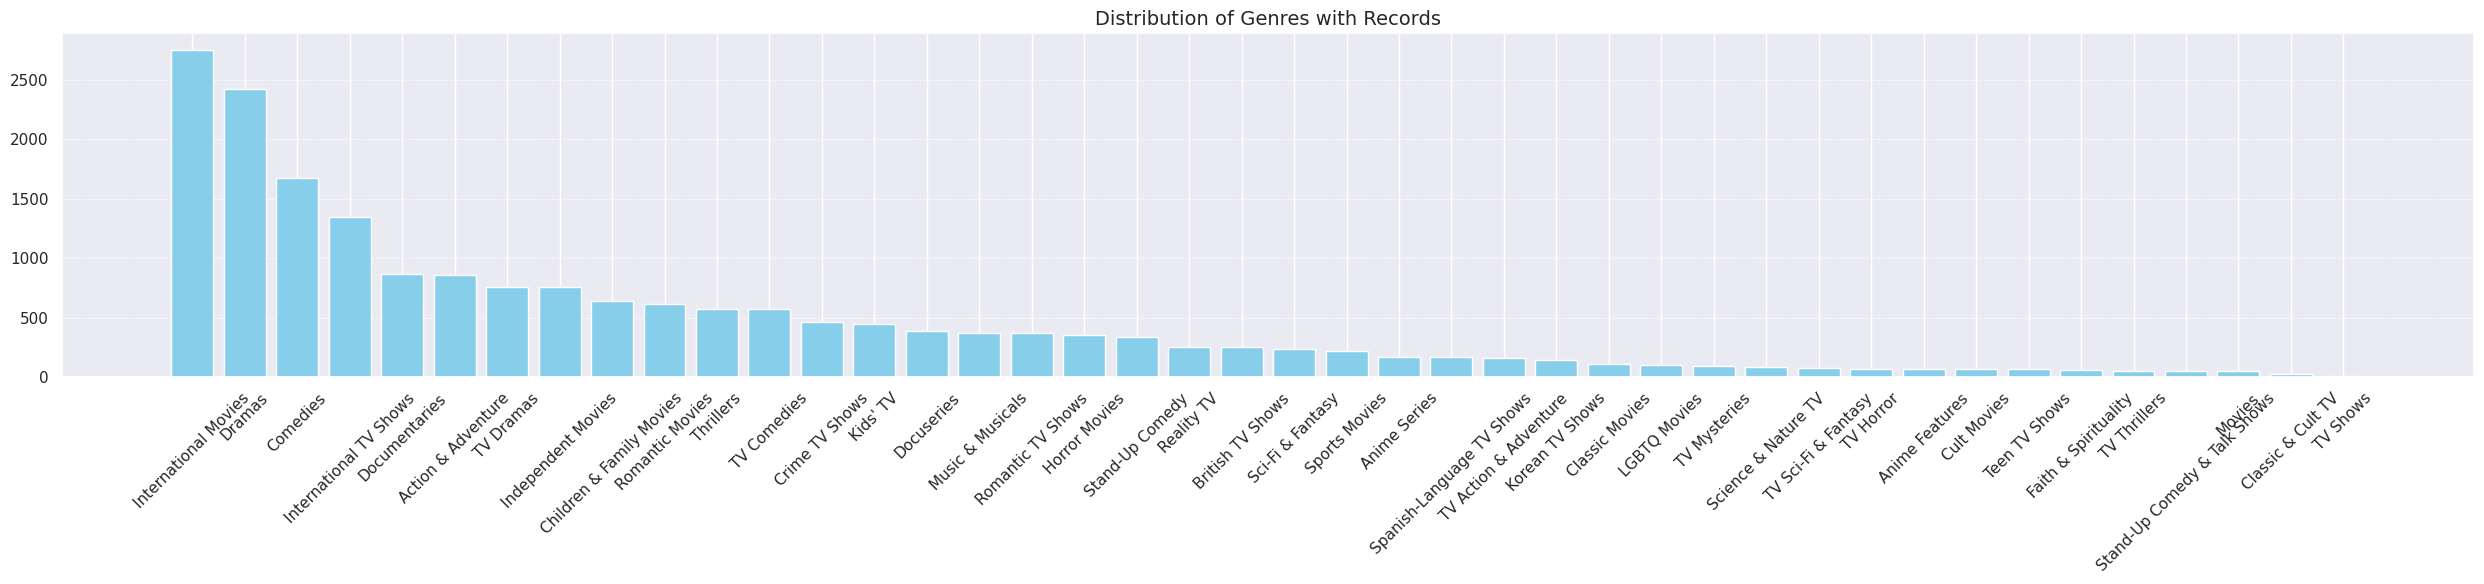

In [46]:
# Creating a histogram to show the distribution of the Genres
plt.figure(figsize=(25, 6))

bars = plt.bar(genre_counts.index, genre_counts.values, color='skyblue')

# plt.xlabel('Genres', fontsize=12)
# plt.ylabel('Number of Records', fontsize=12)
plt.title('Distribution of Genres with Records', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Mean count of movies/shows per country: 459.3809523809524


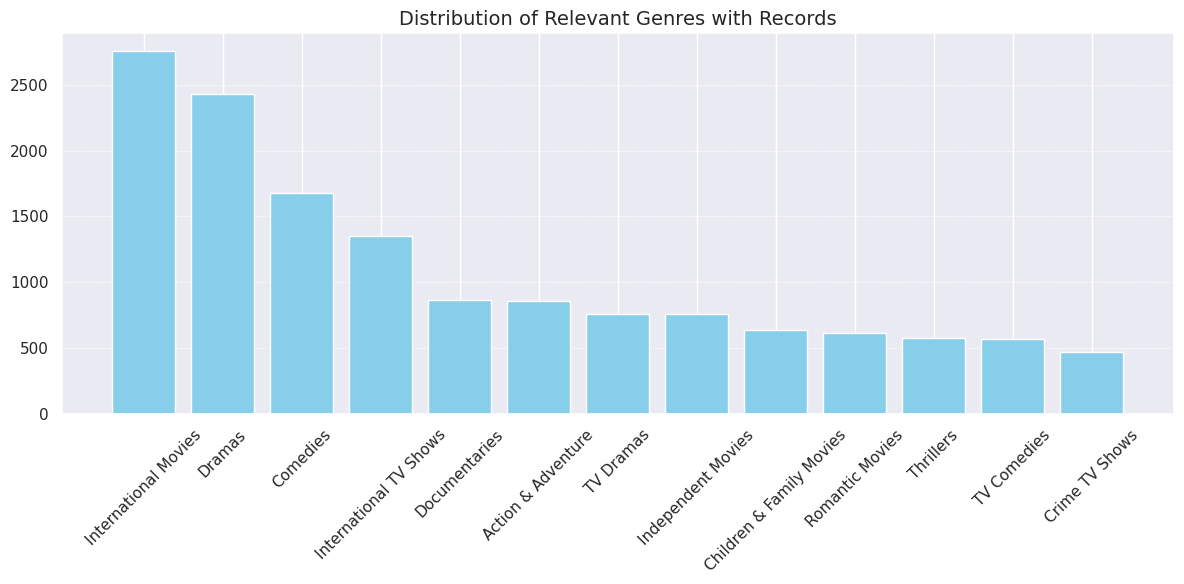

In [47]:
#Relevant Genres more than mean

genres_mean_count = genre_counts.mean()
print(f"Mean count of movies/shows per country: {genres_mean_count}")
relevant_genres = genre_counts[genre_counts >= genres_mean_count]

plt.figure(figsize=(12, 6))

bars = plt.bar(relevant_genres.index, relevant_genres.values, color='skyblue')

# plt.xlabel('Genres', fontsize=12)
# plt.ylabel('Number of Records', fontsize=12)
plt.title('Distribution of Relevant Genres with Records', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()